## AJUSTES DE CURVAS
# -Regresion lineal por minimos cuadrados 


In [3]:
#import de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax


ModuleNotFoundError: No module named 'pandas'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def estimar_coeficientes(x, y):
    # número de observaciones/puntos
    n = np.size(x)
  
    # media de los vectores x e y
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calcular la covarianza cruzada y la varianza de x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
  
    # calcular los coeficientes de la regresión
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
  
    return (b_0, b_1)
  
def trazar_linea_de_regresion(x, y, b):
    # trazar los puntos reales como un gráfico de dispersión
    plt.scatter(x, y, color="m",
                marker="o", s=30)
  
    # vector de respuesta predicha
    y_pred = b[0] + b[1] * x
  
    # trazar la línea de regresión
    plt.plot(x, y_pred, color="g")
  
    # agregar etiquetas
    plt.xlabel('x')
    plt.ylabel('y')
  
    # función para mostrar el gráfico
    plt.show()
  
def main():
    # observaciones / datos
    x = np.array([1, 2, 3, 4, 5, 6, 7])
    y = np.array([0.5, 2.5, 2, 4, 3.5, 6, 5.5])
  
    # estimar coeficientes
    b = estimar_coeficientes(x, y)
    print("Coeficientes estimados:\na0 = {:.4f}  \na1 = {:.4f}".format(b[0], b[1]))
  
    print("y = {:.4f}x + {:.4f}".format(b[1], b[0]))
    # trazar la línea de regresión
    trazar_linea_de_regresion(x, y, b)
  
if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'numpy'

Coeficientes estimados:
a0 = 0.0714  
a1 = 0.8393
y = 0.8393x + 0.0714


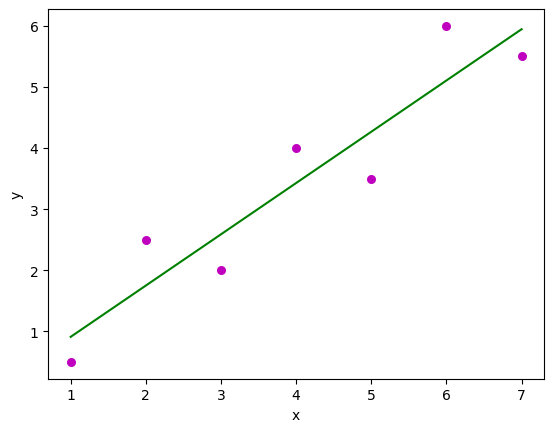


 Tabla de valores en cada iteración:
          x     y    x^2    x*y
0       1.0   0.5    1.0    0.5
1       2.0   2.5    4.0    5.0
2       3.0   2.0    9.0    6.0
3       4.0   4.0   16.0   16.0
4       5.0   3.5   25.0   17.5
5       6.0   6.0   36.0   36.0
6       7.0   5.5   49.0   38.5
Total  28.0  24.0  140.0  119.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def estimar_coeficientes(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x
    return (b_0, b_1)

def trazar_linea_de_regresion(x, y, b):
    plt.scatter(x, y, color="m", marker="o", s=30)
    y_pred = b[0] + b[1] * x
    plt.plot(x, y_pred, color="g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def main():
    x = np.array([1, 2, 3, 4, 5, 6, 7])
    y = np.array([0.5, 2.5, 2, 4, 3.5, 6, 5.5])
    b = estimar_coeficientes(x, y)
    print("Coeficientes estimados:\na0 = {:.4f}  \na1 = {:.4f}".format(b[0], b[1]))
    print("y = {:.4f}x + {:.4f}".format(b[1], b[0]))
    trazar_linea_de_regresion(x, y, b)

    # Crear un DataFrame para mostrar los valores en cada iteración
    df = pd.DataFrame({'x': x, 'y': y, 'x^2': x**2, 'x*y': x * y})
    df.loc['Total', 'x'] = df['x'].sum()
    df.loc['Total', 'y'] = df['y'].sum()
    df.loc['Total', 'x^2'] = df['x^2'].sum()
    df.loc['Total', 'x*y'] = df['x*y'].sum()
        
    print("\n Tabla de valores en cada iteración:")
    print(df)


if __name__ == "__main__":
    main()


# INTERPOLACIÓN POLINOMIAL DE NEWTON

In [24]:
import numpy as np
import pandas as pd

array=[]

def interpolacion_polinomial_newton(x, y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1]) / (x[k:m] - x[k - 1])
    return a


def newton_polynomial(x_data, y_data, x):
    
    a = interpolacion_polinomial_newton(x_data, y_data)
    n = len(x_data) - 1
    p_values = []

    for eval_point in x:
        p = a[n]
        for k in range(1, n + 1):
            p = a[n - k] + (eval_point - x_data[n - k]) * p
        p_values.append(p)

    interpolated_data = pd.DataFrame({'x': x, 'Valor': p_values})
    return interpolated_data

a =interpolacion_polinomial_newton([0, 1, 2, 3], [-4, -3.3513, -2.2817, -0.5183])
print("Coeficientes del polinomio interpolante de Newton: ")
b= {"A":a[0],"B":a[1],"C":a[2],"D":a[3]}
print(b)

interpolated_data_table = newton_polynomial([0, 1, 2, 3], [-4, -3.3513, -2.2817, -0.5183], [1.15])
print("\nValuado en 1.15: ")
print(interpolated_data_table)



Coeficientes del polinomio interpolante de Newton: 
{'A': -4.0, 'B': 0.6486999999999998, 'C': 0.21045000000000025, 'D': 0.04548333333333321}

Valuado en 1.15: 
      x     Valor
0  1.15 -3.224361


# Polinomio de Lagrange

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import sympy as sp

x = sp.Symbol('x')
points = [(0,1),(1,0.765198),(2,0.223891),(3,-0.260052)]
l = ["L0","L1","L2","L3"]
n = len(points)

def main():
	P = lagrange()
	color = ['b','g','r','m','c']
	for i in range(4):
		Li = sp.simplify(g(i))
		print("L"+str(i)+" : " + str(sp.expand(Li)))
		plot(Li,color[i],l[i])

	print("P3(x) : " + str(sp.expand(P)))
	plot(P,color[4],"p3(x)")

	x_list = []
	y_list = []
	for x_p, y_p in points:
		x_list.append(x_p)
		y_list.append(y_p)
	plt.plot(x_list, y_list,  'ro',label = "data points")

	plt.xlabel("X - Axis")
	plt.ylabel("Y - Axis")
	plt.xlim(-1, 4)
	plt.ylim(-2, 4)
	plt.legend(loc='upper center',numpoints = 1)
	plt.show()
	

def plot(f,color,la):
	t = np.arange(-1,4,0.01)
	y = [ f.evalf(subs = {x:i}) for i in t]
	plot = plt.plot( t, y,color,label = la,linewidth=1.5)

def g(i):			
	tot_mul = 1
	for j in xrange(n):
		if i != j:
			xj, yj = points[j]
			tot_mul *= (x - xj) / float(points[i][0] - xj)
		
	return tot_mul

def lagrange():
	total = 0
	for i in xrange(n):
		total += points[i][1] * g(i)
	total = (sp.simplify(total))
	return total

main()

ModuleNotFoundError: No module named 'numpy'

# Trazadora Cubica




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def cubic_spline_interpolation(x, y):
    n = len(x)     # Obtener el número de puntos de datos
    h = np.diff(x)     # Calcular las diferencias entre puntos adyacentes en el eje x
    alpha = np.zeros(n)    # Inicializar un arreglo para almacenar los coeficientes 'alpha'

    # Calcular los coeficientes 'alpha' para cada punto interno
    for i in range(1, n - 1):
        alpha[i] = 3.0/h[i] * (y[i+1] - y[i]) - 3.0/h[i-1] * (y[i] - y[i-1])
    
    
    # Inicializar arreglos para 'l', 'mu', y 'z'
    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    
    # Inicializar valores iniciales para 'l', 'mu', y 'z'
    l[0] = 1.0
    mu[0] = 0.0
    z[0] = 0.0
    
    # Calcular 'l', 'mu', y 'z' para resolver el sistema tridiagonal
    for i in range(1, n - 1):
        l[i] = 2.0 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
    # Condiciones de frontera
    l[n-1] = 1.0
    z[n-1] = 0.0

    # Inicializar arreglos para 'c', 'b', y 'd'
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    c[n-1] = 0.0
    
    # Calcular los coeficientes 'c', 'b', y 'd' de la spline cúbica
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2.0 * c[j]) / 3.0
        d[j] = (c[j+1] - c[j]) / (3.0 * h[j])
    
    # Devolver los valores de 'y' originales, 'b', 'c', y 'd'
    return y, b, c, d

# Arrays con los punto de muestra
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 2, 1, 3])

# Realiza la interpolación por trazadora cúbica
y_interp, b, c, d = cubic_spline_interpolation(x, y)

# Crea un dataframe para mostrar los valores en cada iteración
data = {
    "X": x,
    "Y": y,
    "B": b,
    "C": c,
    "D": d
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   X  Y         B         C         D
0  0  0  1.822967  0.000000 -0.822967
1  1  1 -0.645933 -2.468900  2.114833
2  2  0  0.760766  3.875598 -2.636364
3  3  2  0.602871 -4.033493  2.430622
4  4  1 -0.172249  3.258373 -1.086124
5  5  3  0.000000  0.000000  0.000000


# Trazadora cubica natural

   X       A         B        C         D
0  0  1.0000  1.465847  0.00000  0.252353
1  1  2.7182  2.222907  0.75706  1.690933
2  2  7.3891  8.809827  5.82986 -1.943287


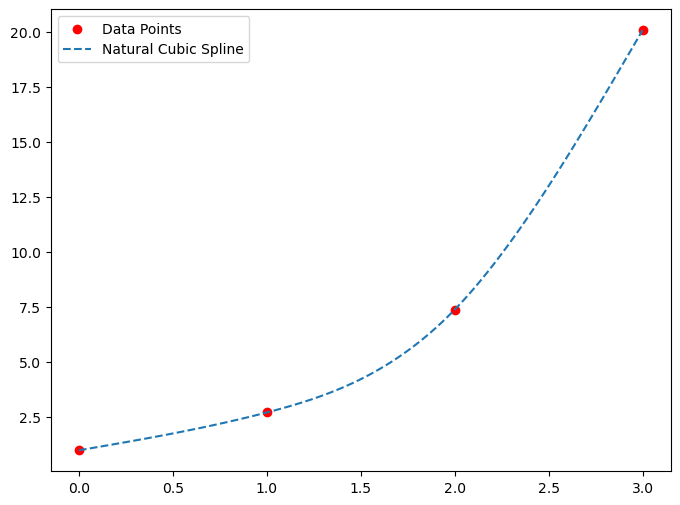

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def natural_cubic_spline(x, y):
    n = len(x)
    h = np.diff(x)
    
    # Create tridiagonal system matrix A and right-hand side vector b
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2.0 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 3.0 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])
    
    # Natural boundary conditions
    A[0, 0] = 1.0
    A[n - 1, n - 1] = 1.0
    
    # Solve the system for second derivatives (c)
    c = np.linalg.solve(A, b)
    
    # Calculate coefficients a, b, and d
    a = y[:-1]
    b = (y[1:] - y[:-1]) / h - h * (c[1:] + 2.0 * c[:-1]) / 3.0
    d = (c[1:] - c[:-1]) / (3.0 * h)
    
    return a, b, c, d

# Updated data points
x = np.array([0, 1, 2, 3])  # x has 4 elements
y = np.array([1, 2.7182, 7.3891, 20.0855])  # y has 4 elements

# Compute the coefficients of the natural cubic spline
a, b, c, d = natural_cubic_spline(x, y)

# Generate some points along the curve for plotting
x_interp = np.linspace(min(x), max(x), 102)

# Ensure y has the same length as x for interpolation
y_interp = np.array([])

# Create a DataFrame to display the results
data = {
    "X": x[:-1],  # Exclude the last point since we have n-1 segments
    "A": a,
    "B": b,
    "C": c[:-1],  # Exclude the last c value
    "D": d
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

for i in range(len(x) - 1):
    mask = (x_interp >= x[i]) & (x_interp <= x[i + 1])
    x_segment = x_interp[mask]
    y_segment = a[i] + b[i] * (x_segment - x[i]) + c[i] * (x_segment - x[i])**2 + d[i] * (x_segment - x[i])**3
    y_interp = np.concatenate((y_interp, y_segment))

# Plot the original data points and the natural cubic spline
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data Points", color='red')
plt.plot(x_interp, y_interp, label="Natural Cubic Spline", linestyle='--')
plt.legend()
plt.show()
